In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import os
import matplotlib.pyplot as plt


In [2]:
directory_path = 'data'  # replace with the path to your directory
turn_manuever = 'data\turn'
df_dict = {}  # a dictionary to store dataframes with filename as key

for filename in os.listdir(directory_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(directory_path, filename)
        df_dict[filename.replace('.xlsx','')] = pd.read_excel(file_path)

# Now, 'dataframes' dictionary contains each xlsx file's content as a dataframe.
# For example, to access a dataframe of a file named 'example.xlsx', you can use dataframes['example.xlsx']


<hr>

In [3]:
manuevers = ['DoubleLaneChange', 'WOTBraking', 'LowSpeedSteer', 'Turn', 'StrightConstSpd', 'ConstantRadius', 'DoubleLaneISO38']
combined_df = pd.DataFrame()

# FR > Front Right
# FL > Front Left
# RR > Rear Right
# RL > Rear Left
# Left or Right based that you are in the car in the driver seat which is FL
passenger_configurations = ['FR', 'FL', 'RR', 'RL']
for name_df, df in df_dict.items():


    columns_to_keep = ['time','DrvBus.aSteerWheel', 'DrvBus.rAccelPedal', 'DrvBus.rBrakePedal', 'VehBus.Chassis.Body.CG.aRoll']
    df = df[columns_to_keep]
    
    # The following for loop is to initialize the car with zeros for all passengers
    for passenger in passenger_configurations:
        df[passenger] = 0

    for manuever in manuevers:
        df[manuever] = 0

    df['df_index'], manuever, *passengers  = name_df.split('_')
    
    df[manuever] = 1

    for passenger in passengers:
        df[passenger] = 1

    combined_df = pd.concat((combined_df, df), axis= 0)
    df_dict[name_df] = df



C:\Users\imoha\AppData\Local\Temp\ipykernel_8268\2161104272.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[passenger] = 0
C:\Users\imoha\AppData\Local\Temp\ipykernel_8268\2161104272.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[passenger] = 0
C:\Users\imoha\AppData\Local\Temp\ipykernel_8268\2161104272.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [4]:
for df in df_dict.values():
    print(df)
    break

          time  DrvBus.aSteerWheel  DrvBus.rAccelPedal  DrvBus.rBrakePedal  \
0     0.000000        0.000000e+00            0.000000        0.000000e+00   
1     0.000007        7.973219e-14            0.000000        2.106936e-09   
2     0.000021        5.571321e-13            0.000000        1.052880e-08   
3     0.000041        3.319326e-12            0.000000        3.868289e-08   
4     0.000091        3.272846e-11            0.000000        1.819939e-07   
..         ...                 ...                 ...                 ...   
853  33.600000        1.287508e-01            0.082821       3.120017e-256   
854  34.000000        1.287266e-01            0.082816        0.000000e+00   
855  34.400000        1.287064e-01            0.082821       1.641746e-256   
856  34.800000        1.286899e-01            0.082818        0.000000e+00   
857  35.000000        1.286851e-01            0.082817       6.158146e-257   

     VehBus.Chassis.Body.CG.aRoll  FR  FL  RR  RL  DoubleLaneCh

<hr>

In [5]:
manuevers = ['DoubleLaneChange', 'WOTBraking', 'LowSpeedSteer', 'Turn', 'StrightConstSpd', 'ConstantRadius', 'DoubleLaneISO38']

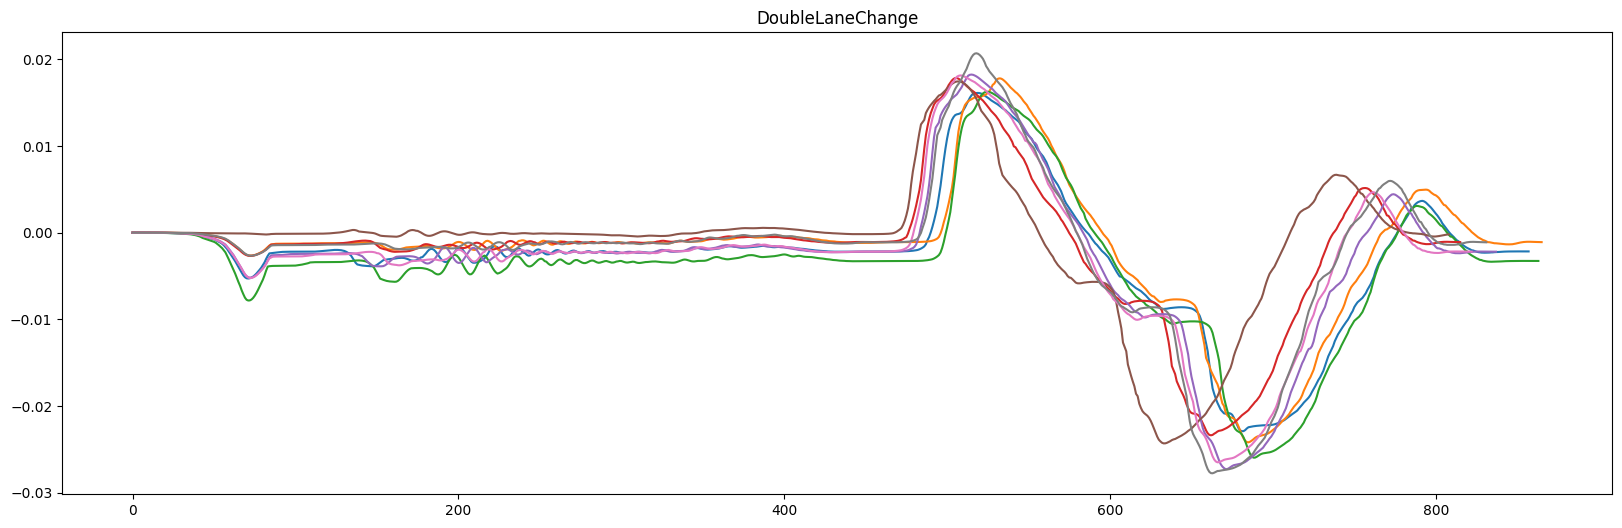

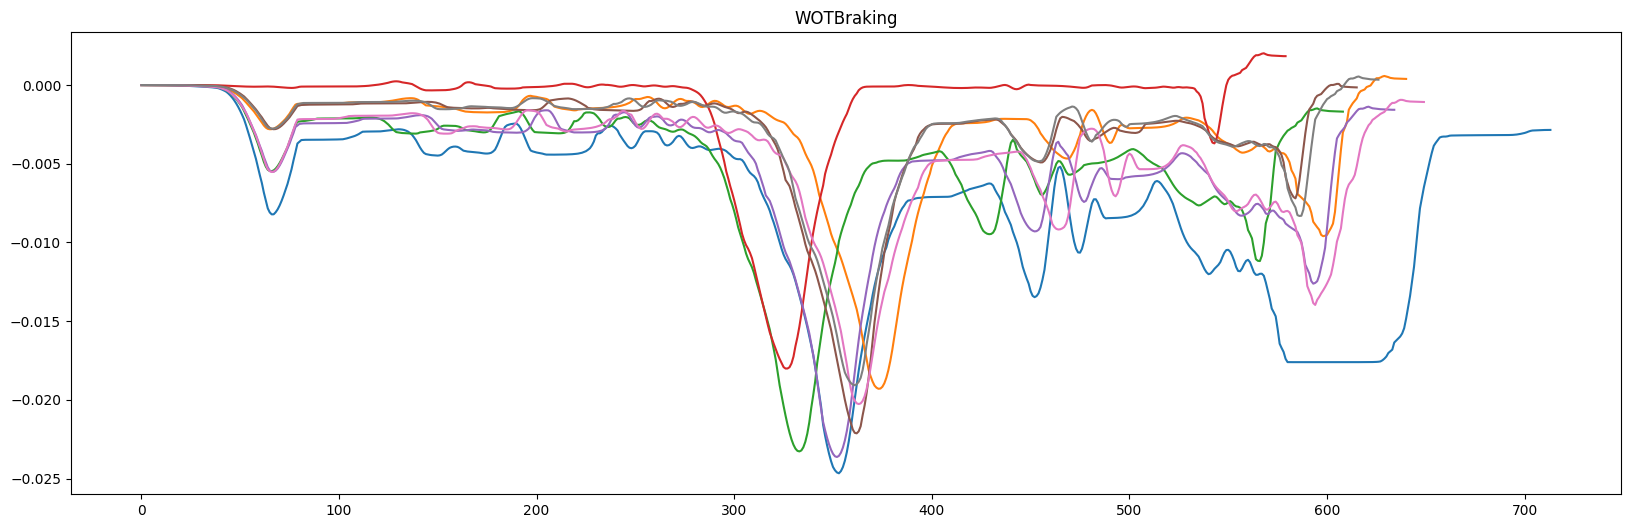

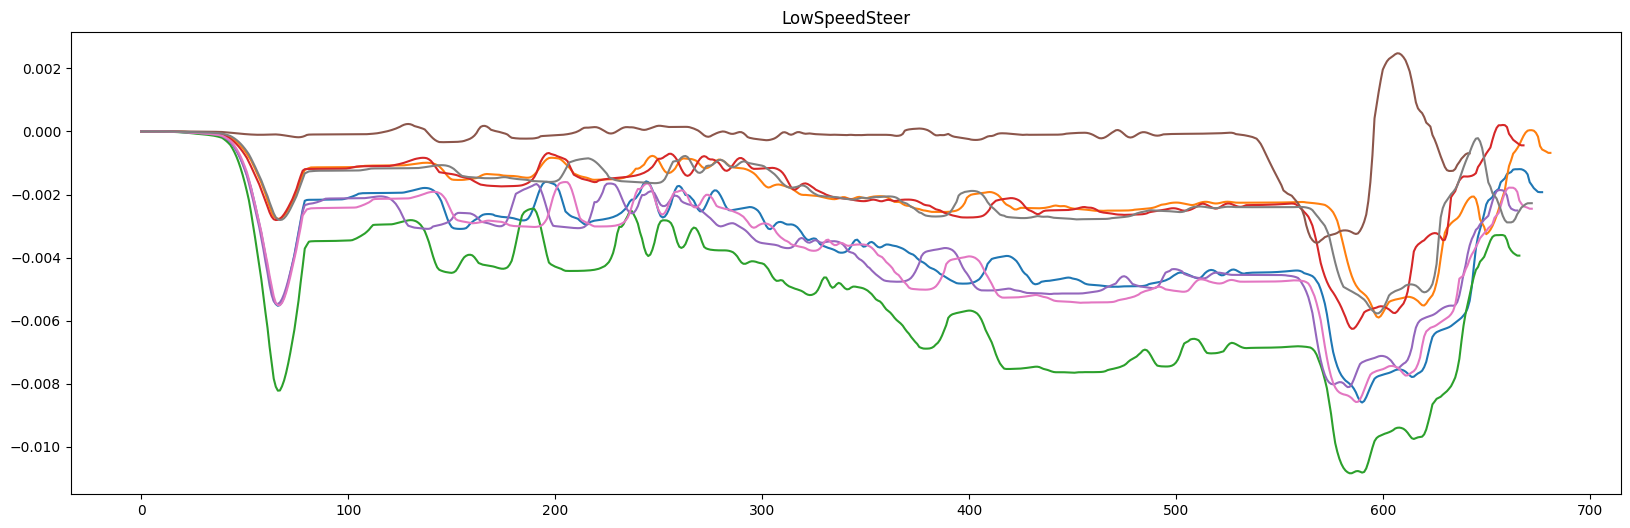

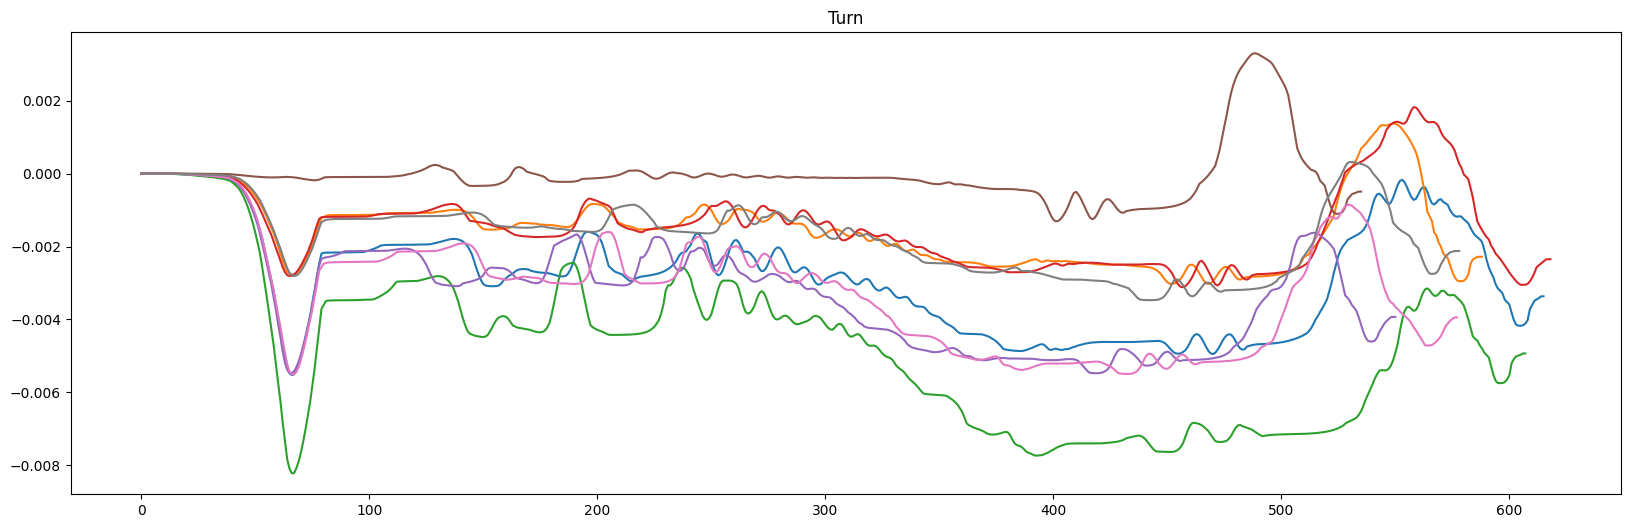

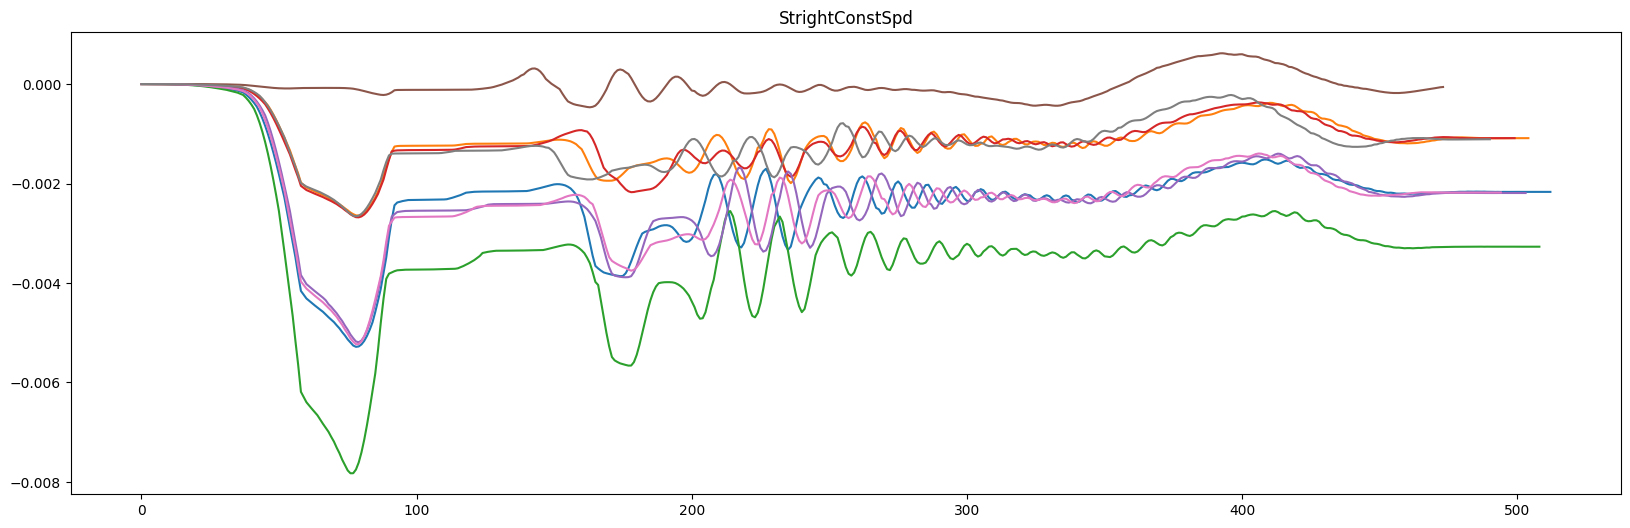

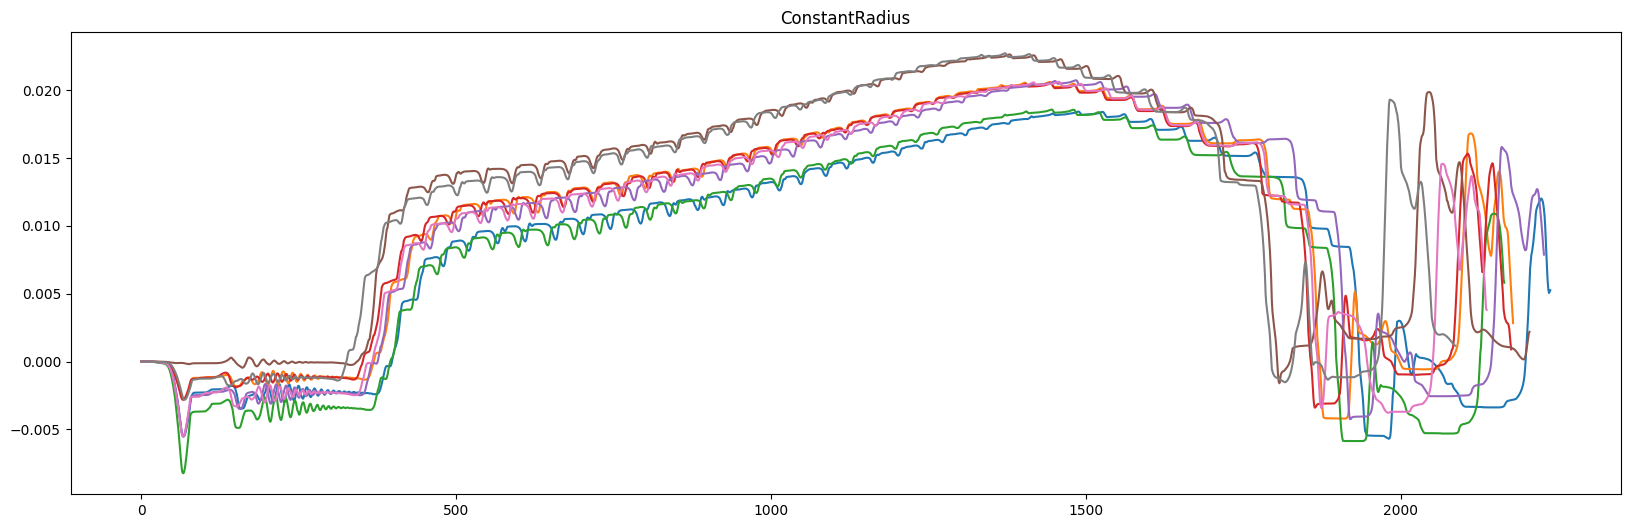

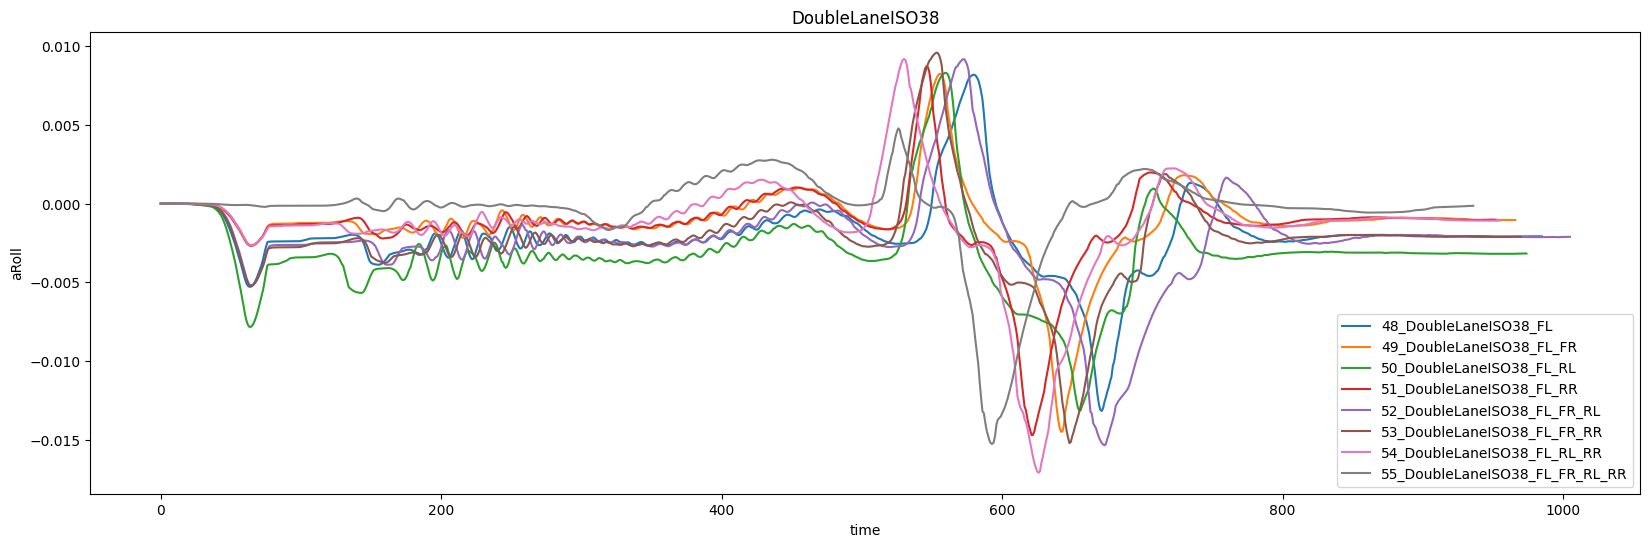

In [6]:
for manuever in manuevers:
    plt.figure(figsize= (20,6))
    for name, df in df_dict.items():
        if manuever in name: 
            plt.plot(df['VehBus.Chassis.Body.CG.aRoll'], label=name)
        plt.title(manuever)
        
plt.xlabel('time')
plt.ylabel('aRoll')
plt.legend()
plt.show()